In [107]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [108]:
from environment.single_family_home import SingleFamilyHome
from utils import *
plt.rcParams['figure.figsize'] = [30, 10]  # width, height in inches

import numpy as np

In [109]:
env = SingleFamilyHome()
env.reset()

({'carbon_intensity': array([0.6695], dtype=float32),
  'household_energy_demand': array([0.], dtype=float32),
  'rooftop_solar_generation': array([-0.303], dtype=float32),
  'battery_state_of_charge': array([0.], dtype=float32),
  'flexible_demand_schedule': array([331.61563], dtype=float32),
  'tcl_state_of_charge': array([0.4], dtype=float32),
  'day_of_year': array([1.], dtype=float32),
  'hour_of_day': array([0.], dtype=float32),
  'solar_irradiation': array([0.], dtype=float32),
  'solar_elevation': array([0.], dtype=float32),
  'temperature': array([12.455], dtype=float32),
  'wind_speed': array([8.29], dtype=float32)},
 {})

In [110]:
data_idle = pickle.load(open("./logs/idle_develop.pkl", "rb"))
data_th = pickle.load(open("./logs/single_threshold_develop.pkl", "rb"))

In [111]:
data_idle["cache"]["tcl_reward"] = [el[0] if not np.isscalar(el) else el for el in data_idle["cache"]["tcl_reward"]]

In [112]:
idle_callback = LoggingCallback()
idle_callback.infos = data_idle

th_callback = LoggingCallback()
th_callback.infos = data_th

In [113]:
reward_idle = np.array(data_idle["reward"])
reward_th = np.array(data_th["reward"])

In [114]:
for i in range(len(reward_th)):
    if reward_th[i] < -100:
        print(i)

0
4480
9802


In [115]:
print(f'Given th: {np.sum(data_th["cache"]["given_reward"])}')
print(f'Given idle: {np.sum(data_idle["cache"]["given_reward"])}')
print(f'Battery th: {np.sum(data_th["cache"]["battery_reward"])}')
print(f'Battery idle: {np.sum(data_idle["cache"]["battery_reward"])}')
print(f'FDR th: {np.sum(data_th["cache"]["fdr_reward"])}')
print(f'FDR idle: {np.sum(data_idle["cache"]["fdr_reward"])}')
print(f'TCL th: {np.sum(data_th["cache"]["tcl_reward"])}')
print(f'TCL idle: {np.sum(data_idle["cache"]["tcl_reward"])}')

Given th: -2838.8562849437176
Given idle: -2838.8562849437176
Battery th: 599.6478162622188
Battery idle: 0.0
FDR th: -2887.9361253604184
FDR idle: -3180.5887878301764
TCL th: -6399.832929535182
TCL idle: -6233.392222222222


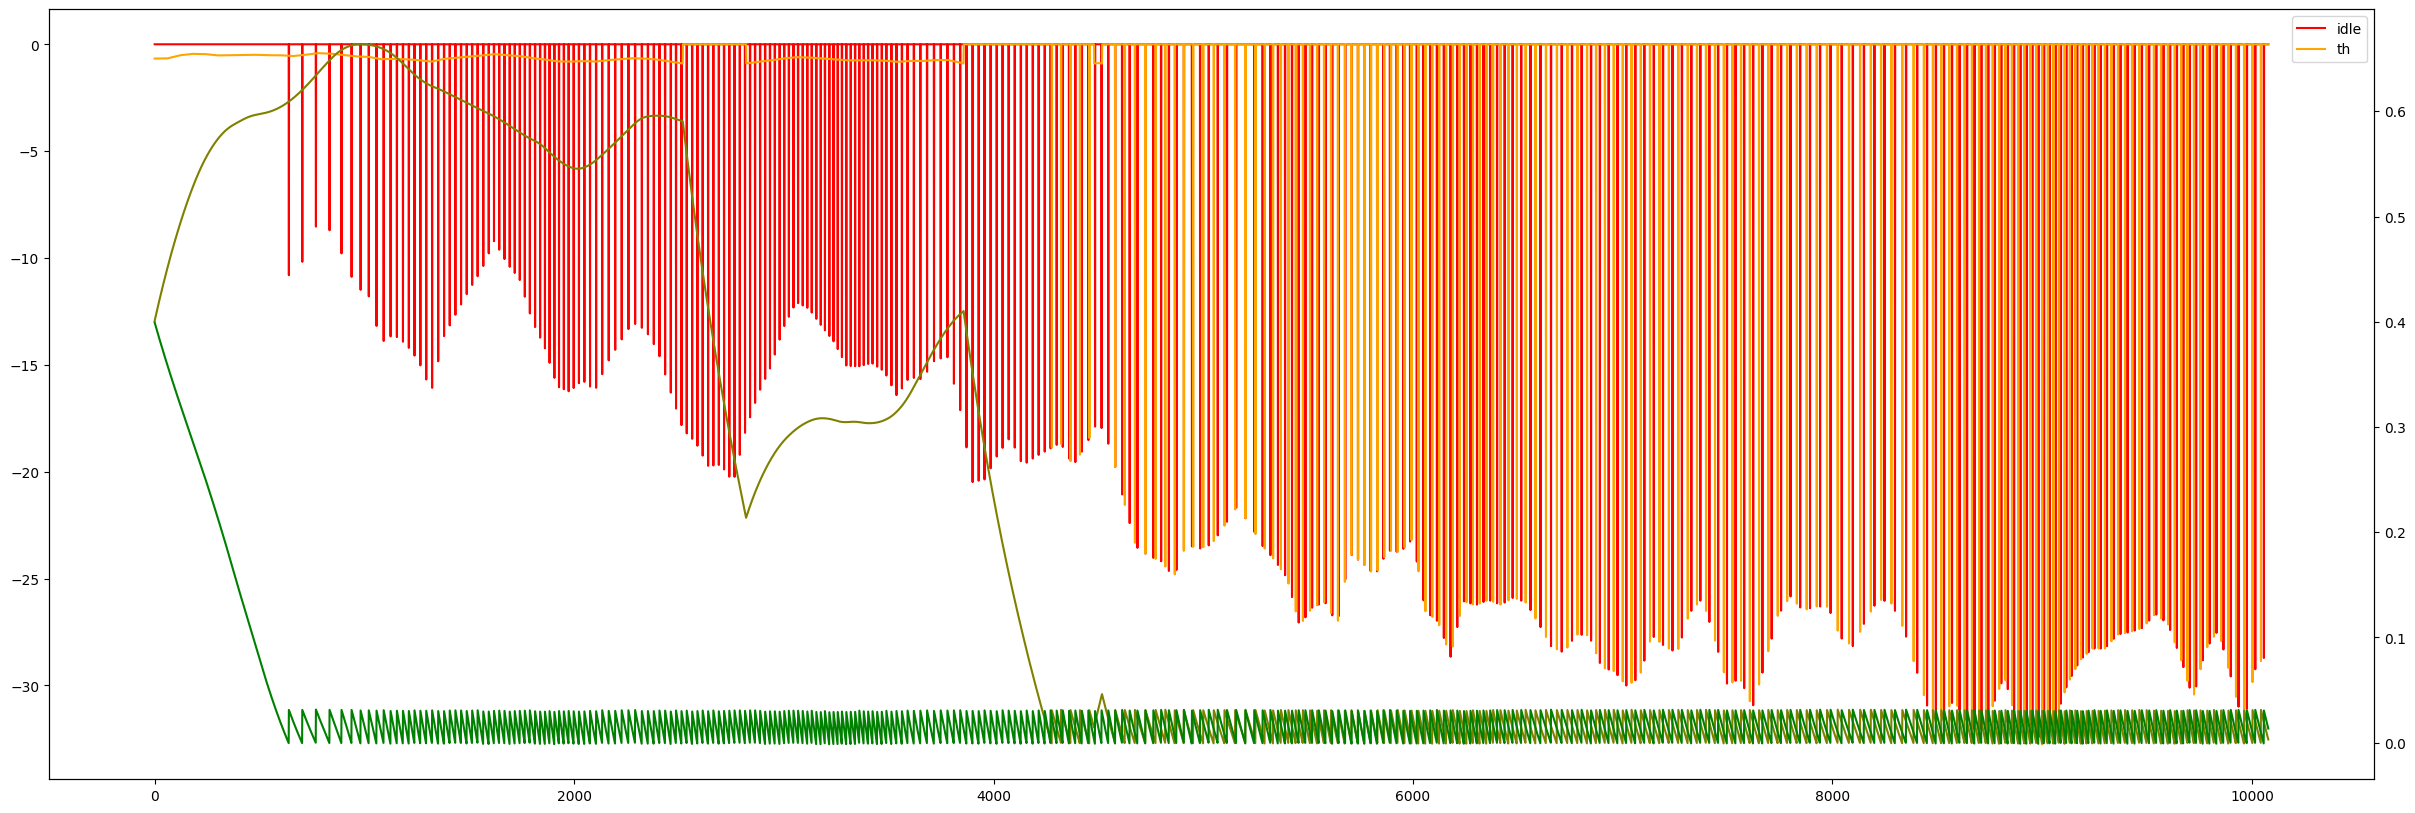

In [116]:
fig, ax = plt.subplots()

ax.plot(data_idle["cache"]["tcl_reward"], label="idle", color="red")
ax.plot(data_th["cache"]["tcl_reward"], label="th", color="orange")


ax2 = ax.twinx()
ax2.plot(np.array(data_th["next_observation"]["tcl_state_of_charge"] ), label="soc_th", color="olive")
ax2.plot(np.array(data_idle["next_observation"]["tcl_state_of_charge"]), label="soc_idle", color="green")

ax.legend()

In [117]:
cum_battery_reward_th = np.cumsum(data_th["cache"]["battery_reward"])

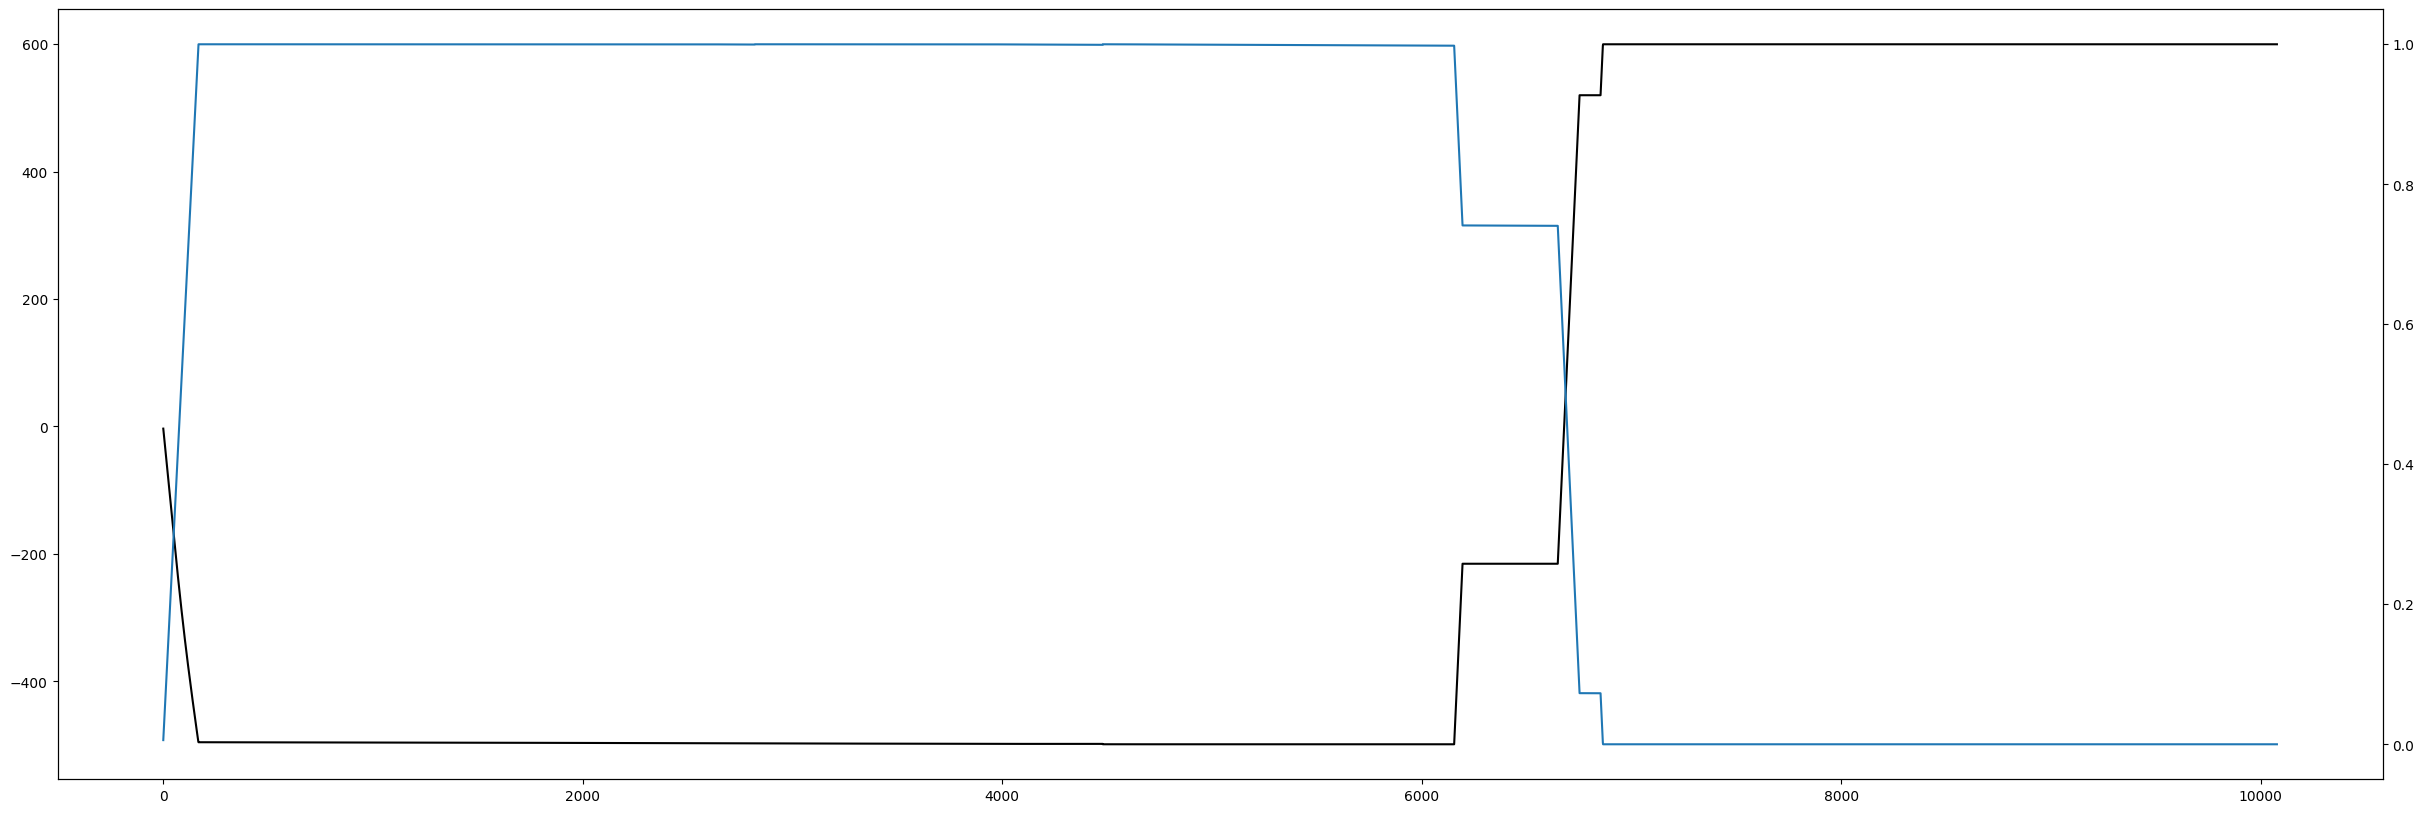

In [118]:
fig, ax = plt.subplots()
ax.plot(cum_battery_reward_th, label="cum_rew", color="black")
ax2 = ax.twinx()
ax2.plot(data_th["next_observation"]["battery_state_of_charge"], label="soc")

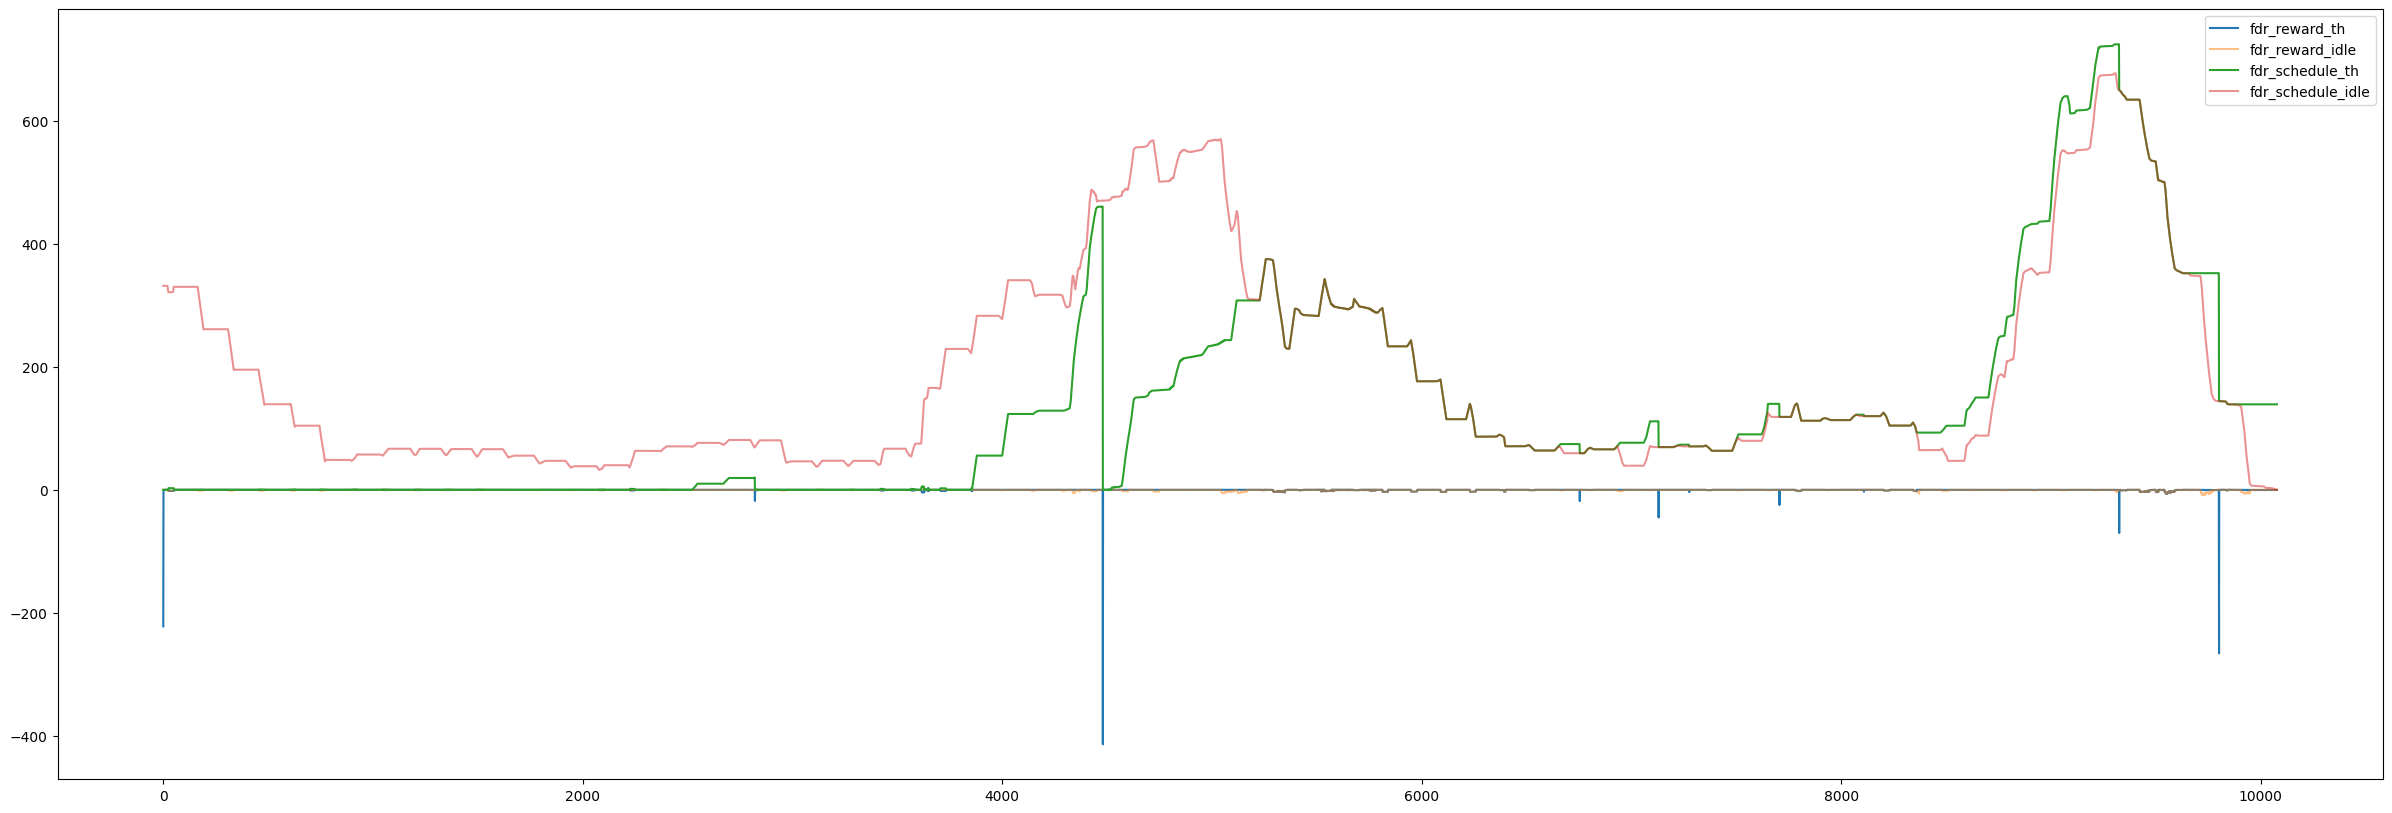

In [119]:
fig, ax = plt.subplots()
ax.plot(data_th["cache"]["fdr_reward"], label="fdr_reward_th")
ax.plot(data_idle["cache"]["fdr_reward"], label="fdr_reward_idle", alpha=0.5)
ax.plot(data_th["next_observation"]["flexible_demand_schedule"], label="fdr_schedule_th")
ax.plot(data_idle["next_observation"]["flexible_demand_schedule"], label="fdr_schedule_idle", alpha=0.5)
ax.legend()

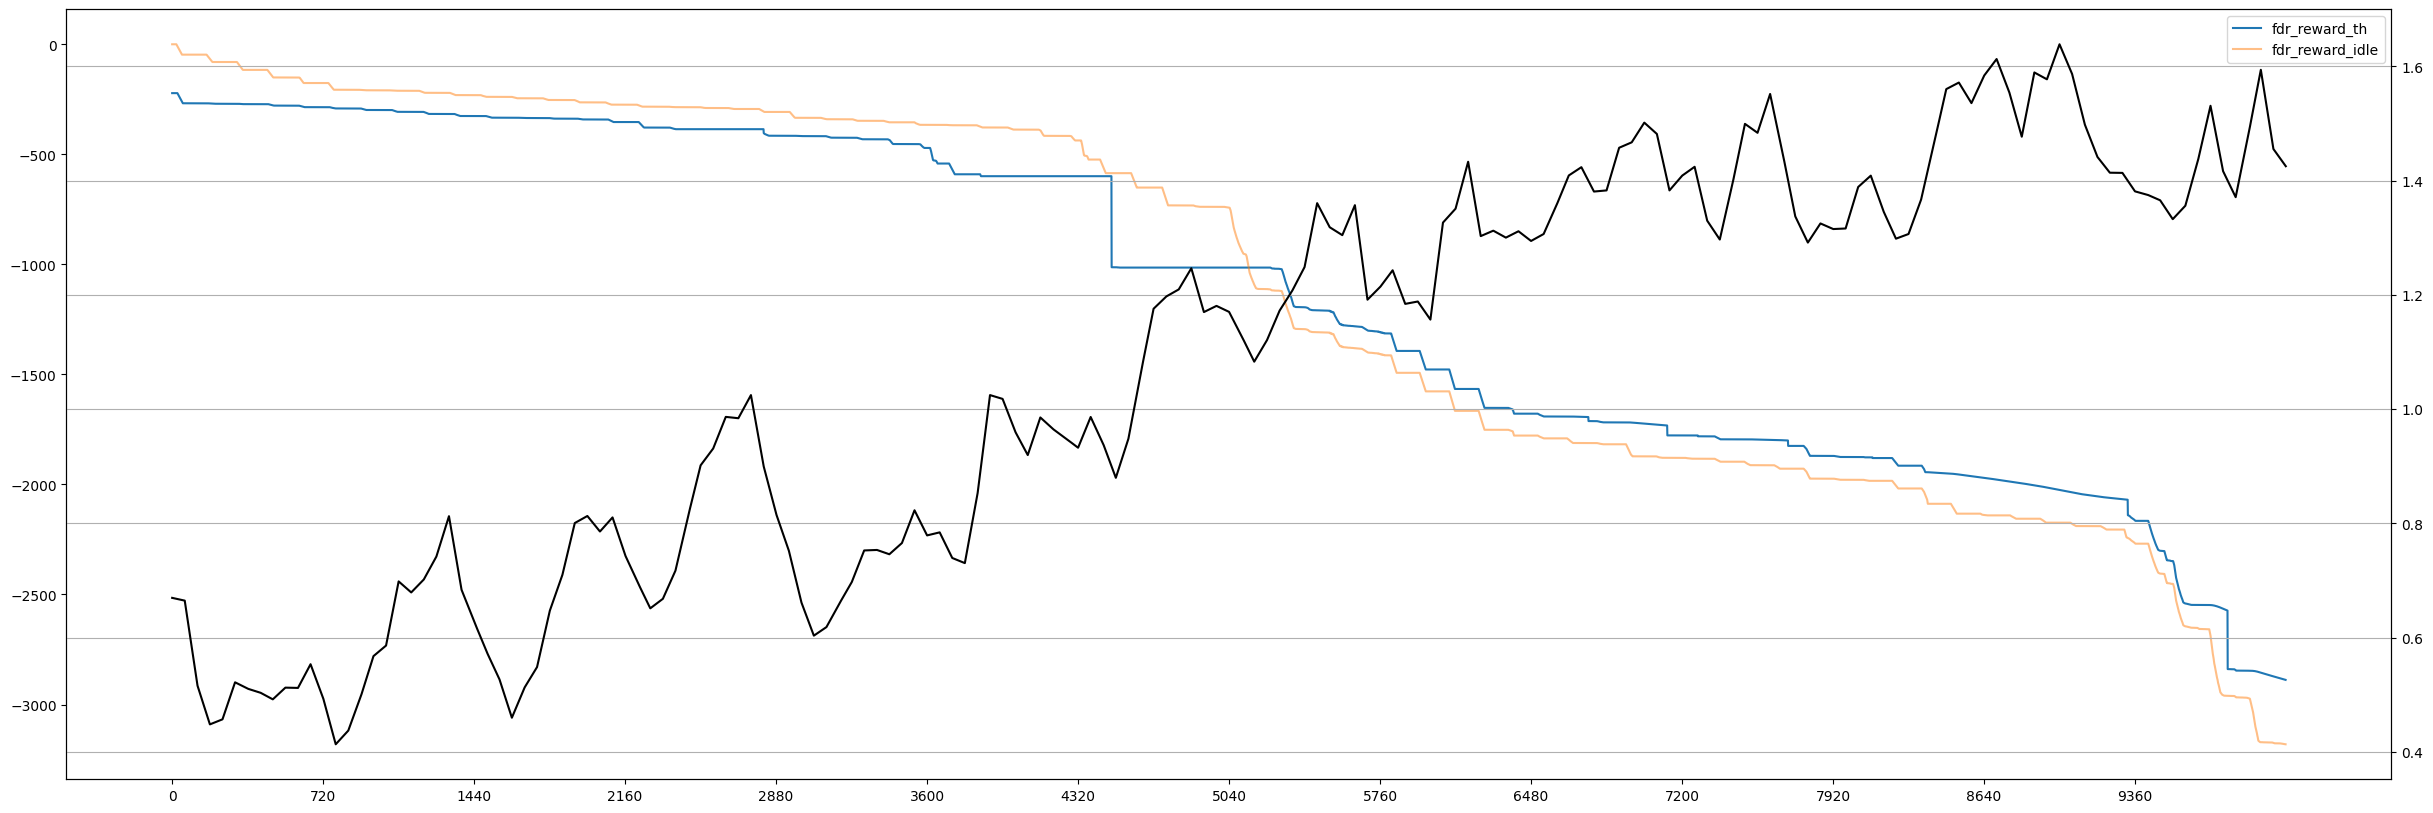

In [120]:
fig, ax = plt.subplots()
ax.plot(np.cumsum(data_th["cache"]["fdr_reward"]), label="fdr_reward_th")
ax.plot(np.cumsum(data_idle["cache"]["fdr_reward"]), label="fdr_reward_idle", alpha=0.5)
ax.legend()
ax.set_xticks(np.arange(0, 10080, 720))


ax2 = ax.twinx()
ax2.plot(env.external_electricity_supply.episode.values, label="intensity", color="black")
ax2.grid()

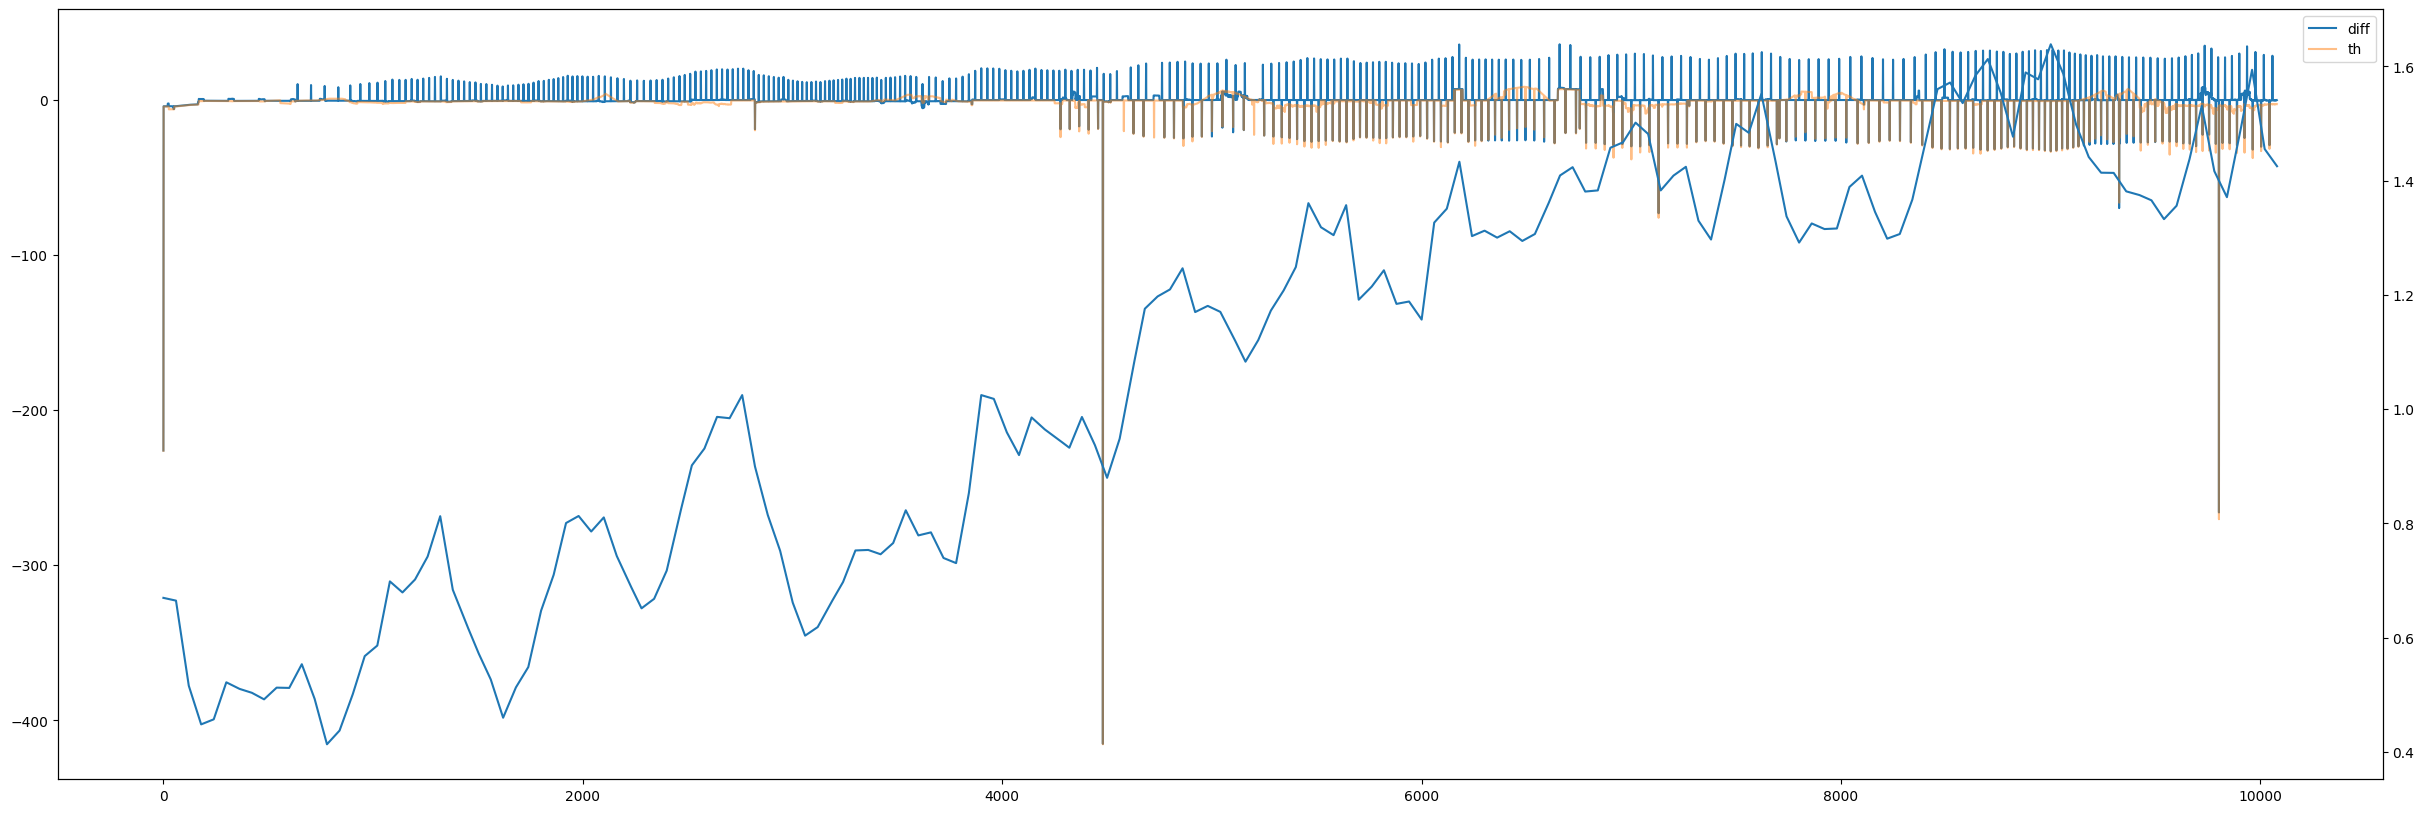

In [121]:
fig, ax = plt.subplots()
ax.plot(reward_th - reward_idle, label="diff")
ax.plot(reward_th, label="th", alpha=0.5)
ax2 = ax.twinx()
ax2.plot(env.external_electricity_supply.episode.values, label="intensity")
ax.legend()

In [129]:
import pickle
import matplotlib.pyplot as plt

ppo = pickle.load(open("./logs/results_only/ppo_develop", "rb"))
sac = pickle.load(open("./logs/results_only/sac_develop", "rb"))
idle = pickle.load(open("./logs/results_only/idle_develop_no_tcl", "rb"))
th = pickle.load(open("./logs/results_only/single_threshold_develop_no_tcl", "rb"))

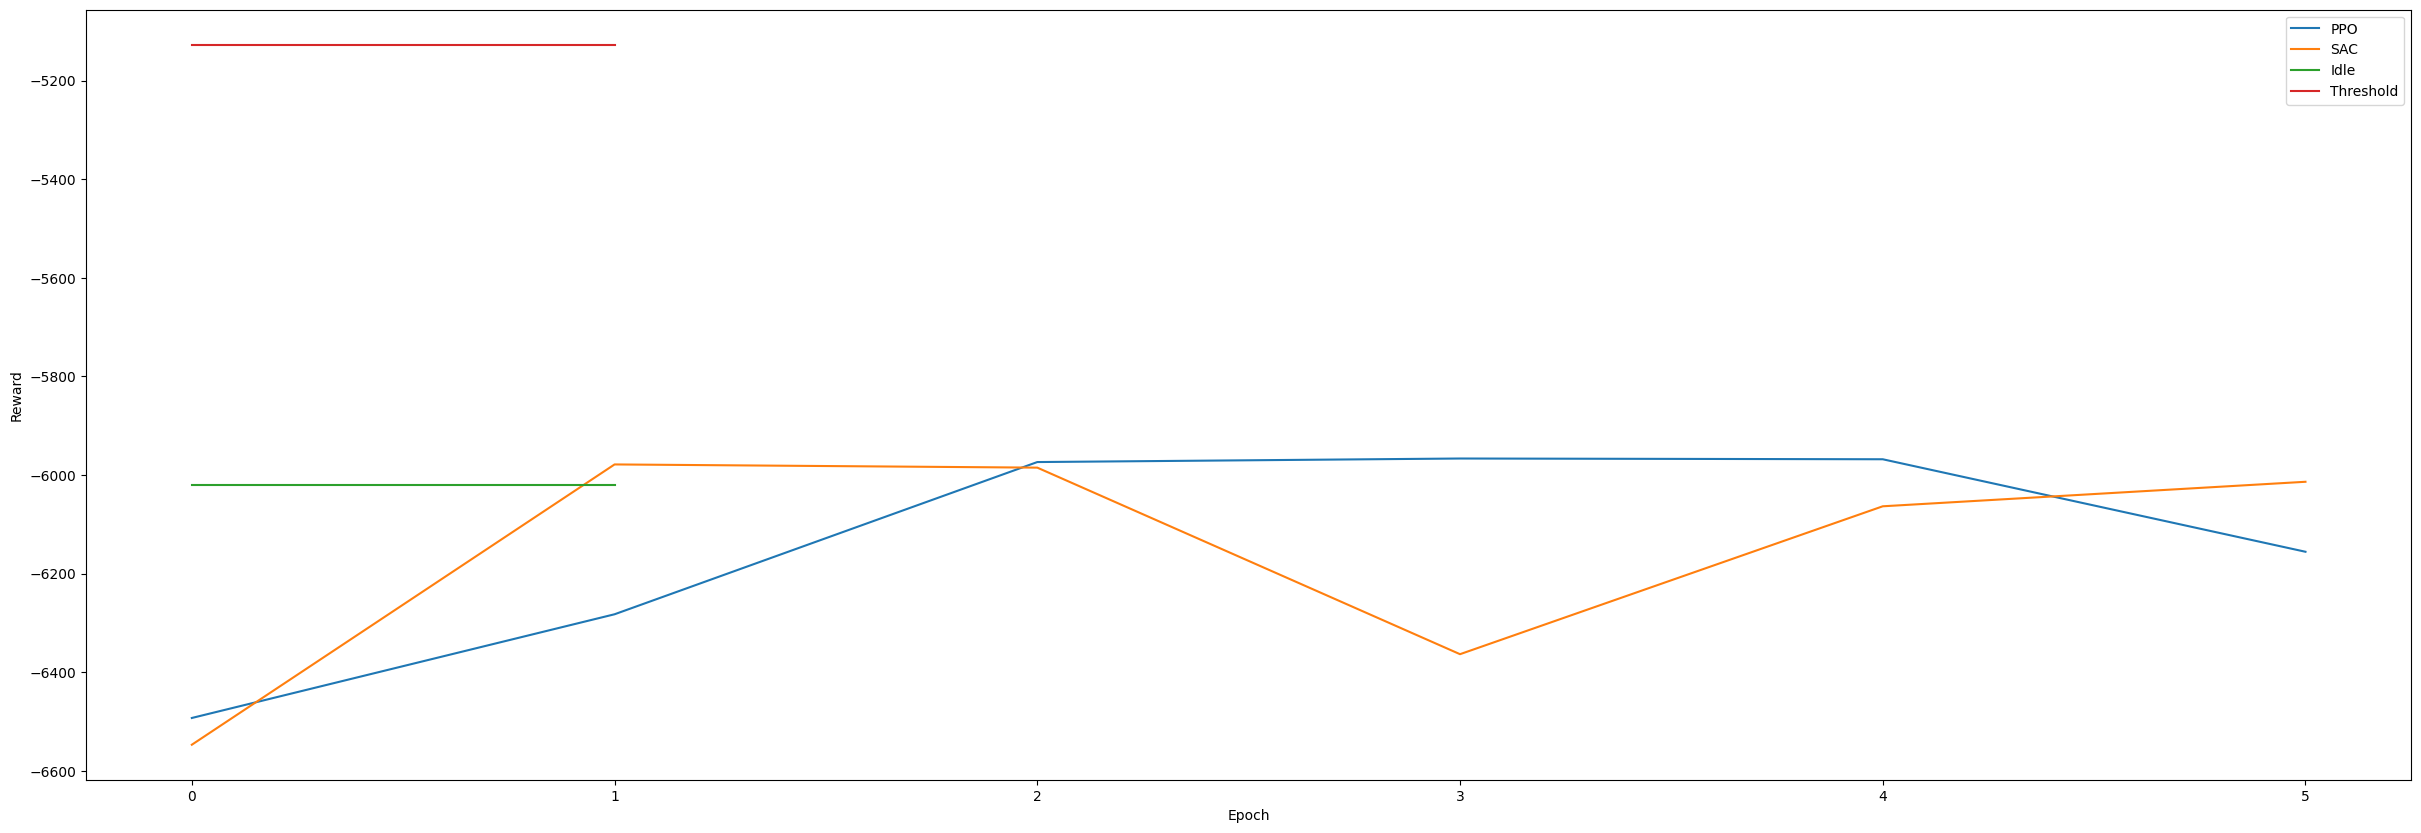

In [130]:
plt.plot([el[0] for el in ppo.values()], label="PPO")
plt.plot([el[0] for el in sac.values()], label="SAC")
plt.plot([el[0] for el in idle.values()], label="Idle")
plt.plot([el[0] for el in th.values()], label="Threshold")
plt.legend()
plt.ylabel("Reward")
plt.xlabel("Epoch")
plt.show()